Load Datasets: Loads all the raw data needed for the subsequent data exploration and feature engineering steps


In [ ]:
# Healthcare Provider Fraud Detection
# Person 1: Data Exploration & Feature Engineering
# DataOrbit Project - Machine Learning Winter 2025

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("HEALTHCARE PROVIDER FRAUD DETECTION - DATA EXPLORATION")

# Load all datasets
print("\n[1] Loading datasets...")
beneficiary_df = pd.read_csv('Train_Beneficiarydata-1542865627584.csv')
inpatient_df = pd.read_csv('Train_Inpatientdata-1542865627584.csv')
outpatient_df = pd.read_csv('/content/Train_Outpatientdata-1542865627584.csv')
labels_df = pd.read_csv('Train-1542865627584.csv')

print(f"✓ Beneficiary data: {beneficiary_df.shape}")
print(f"✓ Inpatient data: {inpatient_df.shape}")
print(f"✓ Outpatient data: {outpatient_df.shape}")
print(f"✓ Labels data: {labels_df.shape}")

HEALTHCARE PROVIDER FRAUD DETECTION - DATA EXPLORATION

[1] Loading datasets...
✓ Beneficiary data: (138556, 25)
✓ Inpatient data: (40474, 30)
✓ Outpatient data: (517737, 27)
✓ Labels data: (5410, 2)


focuses on Data Understanding & Quality Assessment. Its main functionalities are:

Dataset Analysis Function: It defines a helper function analyze_dataset that takes a DataFrame and its name, then prints its shape, column data types, missing values, and the first three rows. This provides a quick snapshot of each dataset's characteristics.
Apply Analysis to All Datasets: It applies the analyze_dataset function to beneficiary_df, inpatient_df, outpatient_df, and labels_df.
Key Identifiers Analysis: It then performs an analysis of key unique identifiers across the datasets, such as the number of unique BeneID (beneficiary IDs) and Provider IDs, to understand the granularity and relationships between the data.

In [ ]:

print("DATA UNDERSTANDING & QUALITY ASSESSMENT:")

# Function to analyze dataset
def analyze_dataset(df, name):
    print(f"\n--- {name} ---")
    print(f"Shape: {df.shape}")
    print(f"\nColumn Types:\n{df.dtypes.value_counts()}")
    print(f"\nMissing Values:\n{df.isnull().sum()[df.isnull().sum() > 0]}")
    print(f"\nFirst few rows:")
    print(df.head(3))
    return df

# Analyze each dataset
beneficiary_df = analyze_dataset(beneficiary_df, "BENEFICIARY DATA")
inpatient_df = analyze_dataset(inpatient_df, "INPATIENT DATA")
outpatient_df = analyze_dataset(outpatient_df, "OUTPATIENT DATA")
labels_df = analyze_dataset(labels_df, "LABELS DATA")

# Key identifiers check
print("\n" + "-"*80)
print("KEY IDENTIFIERS ANALYSIS")
print("-"*80)
print(f"Unique Beneficiaries: {beneficiary_df['BeneID'].nunique()}")
print(f"Unique Providers in Inpatient: {inpatient_df['Provider'].nunique()}")
print(f"Unique Providers in Outpatient: {outpatient_df['Provider'].nunique()}")
print(f"Unique Providers in Labels: {labels_df['Provider'].nunique()}")
print(f"\nBeneIDs in Inpatient: {inpatient_df['BeneID'].nunique()}")
print(f"BeneIDs in Outpatient: {outpatient_df['BeneID'].nunique()}")


DATA UNDERSTANDING & QUALITY ASSESSMENT:

--- BENEFICIARY DATA ---
Shape: (138556, 25)

Column Types:
int64     21
object     4
Name: count, dtype: int64

Missing Values:
DOD    137135
dtype: int64

First few rows:
      BeneID         DOB  DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001  1943-01-01  NaN       1     1                     0     39   
1  BENE11002  1936-09-01  NaN       2     1                     0     39   
2  BENE11003  1936-08-01  NaN       1     1                     0     52   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ChronicCond_Alzheimer  \
0     230                   12                   12                      1   
1     280                   12                   12                      2   
2     590                   12                   12                      1   

   ChronicCond_Heartfailure  ChronicCond_KidneyDisease  ChronicCond_Cancer  \
0                         2                          1                   2   
1          

 Is dedicated to Data Cleaning & Preprocessing. It performs the following key operations:

Convert Date Columns: It identifies various date-related columns across the inpatient_df, outpatient_df, and beneficiary_df DataFrames (such as ClaimStartDt, ClaimEndDt, AdmissionDt, DischargeDt, DOB, DOD) and converts them into proper datetime objects. This is essential for any time-based analysis or feature engineering.
Handle Chronic Condition Columns: It processes the chronic condition columns in beneficiary_df. It first fills any missing values (NaN) with 2 (implying 'No' or 'Not Reported' based on context) and then casts these columns to integer type.
Convert Fraud Labels to Binary: It transforms the PotentialFraud column in labels_df from its original 'Yes'/'No' string format into a binary numerical format (1 for 'Yes' and 0 for 'No'). This prepares the target variable for machine learning.


In [ ]:
print("\n" + "="*80)
print("PART 3: DATA CLEANING & PREPROCESSING")
print("="*80)

# Convert date columns to datetime
date_cols_inpatient = ['ClaimStartDt', 'ClaimEndDt', 'AdmissionDt', 'DischargeDt']
date_cols_outpatient = ['ClaimStartDt', 'ClaimEndDt']
date_cols_beneficiary = ['DOB', 'DOD']

print("\n[3.1] Converting date columns...")
for col in date_cols_inpatient:
    if col in inpatient_df.columns:
        inpatient_df[col] = pd.to_datetime(inpatient_df[col], errors='coerce')

for col in date_cols_outpatient:
    if col in outpatient_df.columns:
        outpatient_df[col] = pd.to_datetime(outpatient_df[col], errors='coerce')

for col in date_cols_beneficiary:
    if col in beneficiary_df.columns:
        beneficiary_df[col] = pd.to_datetime(beneficiary_df[col], errors='coerce')

print("✓ Date conversion completed")

# Handle chronic condition columns (convert to binary)
print("\n[3.2] Processing chronic condition columns...")
chronic_cols = [col for col in beneficiary_df.columns if 'Chronic' in col or 'ChronicCond' in col]
for col in chronic_cols:
    beneficiary_df[col] = beneficiary_df[col].fillna(2).astype(int)
print(f"✓ Processed {len(chronic_cols)} chronic condition columns")

# Convert PotentialFraud to binary
print("\n[3.3] Converting fraud labels to binary...")
labels_df['PotentialFraud'] = (labels_df['PotentialFraud'] == 'Yes').astype(int)
print("✓ Fraud labels converted (1=Fraud, 0=Legitimate)")


PART 3: DATA CLEANING & PREPROCESSING

[3.1] Converting date columns...
✓ Date conversion completed

[3.2] Processing chronic condition columns...
✓ Processed 11 chronic condition columns

[3.3] Converting fraud labels to binary...
✓ Fraud labels converted (1=Fraud, 0=Legitimate)


Is dedicated to Exploratory Data Analysis (EDA). It performs the following analyses:

Fraud Distribution: It calculates and displays the count and percentage of legitimate and fraudulent providers. It also generates bar and pie charts to visualize this distribution, saving the plot as fraud_distribution.png.
Beneficiary Demographics: It calculates the age of beneficiaries based on their date of birth and identifies how many are deceased. It then prints the average age and the distribution of gender and race among beneficiaries.
Claims Amount Analysis: It converts relevant claim amount columns (InscClaimAmtReimbursed and DeductibleAmtPaid) in both inpatient and outpatient dataframes to numeric types, handling any errors. Finally, it prints the average reimbursed claim amounts for both inpatient and outpatient services.



PART 4: EXPLORATORY DATA ANALYSIS

[4.1] Analyzing fraud distribution...

Fraud Distribution:
Legitimate Providers: 4904 (90.65%)
Fraudulent Providers: 506 (9.35%)


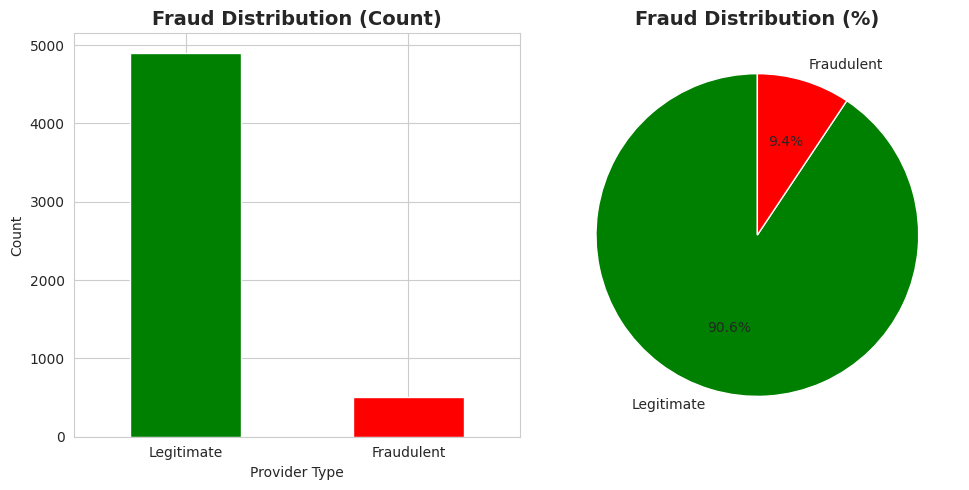


[4.2] Analyzing beneficiary demographics...
Average Age: 73.1 years
Deceased Beneficiaries: 1421 (1.03%)

Gender Distribution:
Gender
2    79106
1    59450
Name: count, dtype: int64

Race Distribution:
Race
1    117057
2     13538
3      5059
5      2902
Name: count, dtype: int64

[4.3] Analyzing claim amounts...
Inpatient avg claim amount: $10,087.88
Outpatient avg claim amount: $286.33


In [ ]:

print("\n" + "="*80)
print("PART 4: EXPLORATORY DATA ANALYSIS")
print("="*80)

# 4.1 Fraud Distribution
print("\n[4.1] Analyzing fraud distribution...")
fraud_counts = labels_df['PotentialFraud'].value_counts()
fraud_pct = labels_df['PotentialFraud'].value_counts(normalize=True) * 100

print(f"\nFraud Distribution:")
print(f"Legitimate Providers: {fraud_counts[0]} ({fraud_pct[0]:.2f}%)")
print(f"Fraudulent Providers: {fraud_counts[1]} ({fraud_pct[1]:.2f}%)")

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
labels_df['PotentialFraud'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Fraud Distribution (Count)', fontsize=14, fontweight='bold')
plt.xlabel('Provider Type')
plt.ylabel('Count')
plt.xticks([0, 1], ['Legitimate', 'Fraudulent'], rotation=0)

plt.subplot(1, 2, 2)
plt.pie(fraud_counts, labels=['Legitimate', 'Fraudulent'], autopct='%1.1f%%',
        colors=['green', 'red'], startangle=90)
plt.title('Fraud Distribution (%)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('fraud_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# 4.2 Beneficiary Demographics Analysis
print("\n[4.2] Analyzing beneficiary demographics...")
beneficiary_df['Age'] = 2009 - pd.to_datetime(beneficiary_df['DOB']).dt.year
beneficiary_df['IsDeceased'] = beneficiary_df['DOD'].notna().astype(int)

print(f"Average Age: {beneficiary_df['Age'].mean():.1f} years")
print(f"Deceased Beneficiaries: {beneficiary_df['IsDeceased'].sum()} ({beneficiary_df['IsDeceased'].mean()*100:.2f}%)")
print(f"\nGender Distribution:\n{beneficiary_df['Gender'].value_counts()}")
print(f"\nRace Distribution:\n{beneficiary_df['Race'].value_counts()}")

# 4.3 Claims Amount Analysis
print("\n[4.3] Analyzing claim amounts...")

# Calculate claim amounts
inpatient_df['InscClaimAmtReimbursed'] = pd.to_numeric(inpatient_df['InscClaimAmtReimbursed'], errors='coerce')
inpatient_df['DeductibleAmtPaid'] = pd.to_numeric(inpatient_df['DeductibleAmtPaid'], errors='coerce')
outpatient_df['InscClaimAmtReimbursed'] = pd.to_numeric(outpatient_df['InscClaimAmtReimbursed'], errors='coerce')
outpatient_df['DeductibleAmtPaid'] = pd.to_numeric(outpatient_df['DeductibleAmtPaid'], errors='coerce')

print(f"Inpatient avg claim amount: ${inpatient_df['InscClaimAmtReimbursed'].mean():,.2f}")
print(f"Outpatient avg claim amount: ${outpatient_df['InscClaimAmtReimbursed'].mean():,.2f}")


Is crucial for Feature Engineering through Provider-Level Aggregation. Its main steps are:

Merge Claims with Beneficiary Data: It merges the inpatient_df and outpatient_df with beneficiary_df based on BeneID to link claims to beneficiary demographics.
Create Inpatient Features: It aggregates inpatient claims data by Provider to generate various features such as total claim count, unique patients, total/average/max reimbursed amounts, deductible amounts, claim duration, admission counts, claims for deceased patients, and average age of patients for inpatient services.
Create Outpatient Features: Similar to inpatient data, it aggregates outpatient claims data by Provider to derive corresponding features for outpatient services.
Aggregate Chronic Conditions: It counts the occurrences of each chronic condition (where ChronicCond == 1) for each provider, separately for inpatient and outpatient claims.
Merge All Provider-Level Features: It consolidates all the generated inpatient, outpatient, and chronic condition features into a single provider_level DataFrame, starting with the labels_df.
Create Additional Derived Features: It computes new features based on the aggregated data, such as Total_ClaimCount, Total_UniquePatients, Total_Reimbursed, Total_DeceasedClaims, AvgReimbursed_PerPatient, AvgClaims_PerPatient, DeceasedClaim_Rate, and Inpatient_Ratio. These derived features aim to capture more complex relationships and potentially improve model performance.

In [ ]:

print("\n" + "="*80)
print("PART 5: FEATURE ENGINEERING - PROVIDER LEVEL AGGREGATION")
print("="*80)

# 5.1 Merge claims with beneficiary data
print("\n[5.1] Merging claims with beneficiary data...")
inpatient_merged = inpatient_df.merge(beneficiary_df, on='BeneID', how='left')
outpatient_merged = outpatient_df.merge(beneficiary_df, on='BeneID', how='left')
print("✓ Merge completed")

# 5.2 Create provider-level features from INPATIENT data
print("\n[5.2] Aggregating inpatient features by provider...")

inpatient_features = inpatient_merged.groupby('Provider').agg({
    'ClaimID': 'count',  # Number of inpatient claims
    'BeneID': 'nunique',  # Unique patients
    'InscClaimAmtReimbursed': ['sum', 'mean', 'std', 'max'],
    'DeductibleAmtPaid': ['sum', 'mean'],
    'ClaimStartDt': lambda x: (x.max() - x.min()).days,  # Claim duration range
    'AdmissionDt': 'count',
    'IsDeceased': 'sum',  # Claims for deceased patients
    'Age': 'mean'
}).reset_index()

# Flatten column names
inpatient_features.columns = ['Provider',
                               'Inpatient_ClaimCount', 'Inpatient_UniquePatients',
                               'Inpatient_TotalReimbursed', 'Inpatient_AvgReimbursed',
                               'Inpatient_StdReimbursed', 'Inpatient_MaxReimbursed',
                               'Inpatient_TotalDeductible', 'Inpatient_AvgDeductible',
                               'Inpatient_ClaimDurationRange', 'Inpatient_AdmissionCount',
                               'Inpatient_DeceasedClaims', 'Inpatient_AvgAge']

print(f"✓ Created {inpatient_features.shape[1]-1} inpatient features")

# 5.3 Create provider-level features from OUTPATIENT data
print("\n[5.3] Aggregating outpatient features by provider...")

outpatient_features = outpatient_merged.groupby('Provider').agg({
    'ClaimID': 'count',
    'BeneID': 'nunique',
    'InscClaimAmtReimbursed': ['sum', 'mean', 'std', 'max'],
    'DeductibleAmtPaid': ['sum', 'mean'],
    'ClaimStartDt': lambda x: (x.max() - x.min()).days,
    'IsDeceased': 'sum',
    'Age': 'mean'
}).reset_index()

outpatient_features.columns = ['Provider',
                                'Outpatient_ClaimCount', 'Outpatient_UniquePatients',
                                'Outpatient_TotalReimbursed', 'Outpatient_AvgReimbursed',
                                'Outpatient_StdReimbursed', 'Outpatient_MaxReimbursed',
                                'Outpatient_TotalDeductible', 'Outpatient_AvgDeductible',
                                'Outpatient_ClaimDurationRange', 'Outpatient_DeceasedClaims',
                                'Outpatient_AvgAge']

print(f"✓ Created {outpatient_features.shape[1]-1} outpatient features")

# 5.4 Aggregate chronic conditions by provider
print("\n[5.4] Aggregating chronic conditions by provider...")

# Inpatient chronic conditions
inpatient_chronic = inpatient_merged.groupby('Provider')[chronic_cols].apply(
    lambda x: (x == 1).sum()
).reset_index()
inpatient_chronic.columns = ['Provider'] + [f'Inpatient_{col}' for col in chronic_cols]

# Outpatient chronic conditions
outpatient_chronic = outpatient_merged.groupby('Provider')[chronic_cols].apply(
    lambda x: (x == 1).sum()
).reset_index()
outpatient_chronic.columns = ['Provider'] + [f'Outpatient_{col}' for col in chronic_cols]

print(f"✓ Aggregated {len(chronic_cols)} chronic conditions")

# 5.5 Merge all provider-level features
print("\n[5.5] Merging all provider-level features...")

provider_level = labels_df.copy()
provider_level = provider_level.merge(inpatient_features, on='Provider', how='left')
provider_level = provider_level.merge(outpatient_features, on='Provider', how='left')
provider_level = provider_level.merge(inpatient_chronic, on='Provider', how='left')
provider_level = provider_level.merge(outpatient_chronic, on='Provider', how='left')

print(f"✓ Provider-level dataset shape: {provider_level.shape}")

# 5.6 Create additional derived features
print("\n[5.6] Creating derived features...")

# Combined features
provider_level['Total_ClaimCount'] = (
    provider_level['Inpatient_ClaimCount'].fillna(0) +
    provider_level['Outpatient_ClaimCount'].fillna(0)
)

provider_level['Total_UniquePatients'] = provider_level[
    ['Inpatient_UniquePatients', 'Outpatient_UniquePatients']
].max(axis=1)

provider_level['Total_Reimbursed'] = (
    provider_level['Inpatient_TotalReimbursed'].fillna(0) +
    provider_level['Outpatient_TotalReimbursed'].fillna(0)
)

provider_level['Total_DeceasedClaims'] = (
    provider_level['Inpatient_DeceasedClaims'].fillna(0) +
    provider_level['Outpatient_DeceasedClaims'].fillna(0)
)

# Ratios and rates
provider_level['AvgReimbursed_PerPatient'] = (
    provider_level['Total_Reimbursed'] / provider_level['Total_UniquePatients']
)

provider_level['AvgClaims_PerPatient'] = (
    provider_level['Total_ClaimCount'] / provider_level['Total_UniquePatients']
)

provider_level['DeceasedClaim_Rate'] = (
    provider_level['Total_DeceasedClaims'] / provider_level['Total_ClaimCount']
)

provider_level['Inpatient_Ratio'] = (
    provider_level['Inpatient_ClaimCount'] / provider_level['Total_ClaimCount']
)

# Fill NaN values
provider_level = provider_level.fillna(0)

print(f"✓ Created derived features")
print(f"✓ Final provider-level dataset: {provider_level.shape}")



PART 5: FEATURE ENGINEERING - PROVIDER LEVEL AGGREGATION

[5.1] Merging claims with beneficiary data...
✓ Merge completed

[5.2] Aggregating inpatient features by provider...
✓ Created 12 inpatient features

[5.3] Aggregating outpatient features by provider...
✓ Created 11 outpatient features

[5.4] Aggregating chronic conditions by provider...
✓ Aggregated 11 chronic conditions

[5.5] Merging all provider-level features...
✓ Provider-level dataset shape: (5410, 47)

[5.6] Creating derived features...
✓ Created derived features
✓ Final provider-level dataset: (5410, 55)


Performs a Comparative Analysis between fraudulent and legitimate providers. It focuses on key aggregated features created in the previous step.

Its main function is to:

Compare Key Statistics: For a selected set of important features (e.g., Total_ClaimCount, Total_UniquePatients, Total_Reimbursed, AvgReimbursed_PerPatient, AvgClaims_PerPatient, DeceasedClaim_Rate, Total_DeceasedClaims), it calculates and prints the mean value for both fraudulent (PotentialFraud = 1) and legitimate (PotentialFraud = 0) providers.
Calculate Percentage Difference: It also computes and displays the percentage difference between the fraudulent and legitimate provider means for each feature.
The goal is to highlight significant differences in these key metrics, which can indicate patterns associated with fraudulent behavior and serve as important insights for model development.

In [ ]:

print("\n" + "="*80)
print("PART 6: COMPARATIVE ANALYSIS - FRAUD vs LEGITIMATE PROVIDERS")
print("="*80)

# Key statistics comparison
comparison_features = [
    'Total_ClaimCount', 'Total_UniquePatients', 'Total_Reimbursed',
    'AvgReimbursed_PerPatient', 'AvgClaims_PerPatient',
    'DeceasedClaim_Rate', 'Total_DeceasedClaims'
]

print("\n" + "-"*80)
print("FRAUD vs LEGITIMATE COMPARISON")
print("-"*80)

for feature in comparison_features:
    fraud_mean = provider_level[provider_level['PotentialFraud']==1][feature].mean()
    legit_mean = provider_level[provider_level['PotentialFraud']==0][feature].mean()
    diff_pct = ((fraud_mean - legit_mean) / legit_mean * 100) if legit_mean != 0 else 0

    print(f"\n{feature}:")
    print(f"  Fraudulent: {fraud_mean:,.2f}")
    print(f"  Legitimate: {legit_mean:,.2f}")
    print(f"  Difference: {diff_pct:+.1f}%")



PART 6: COMPARATIVE ANALYSIS - FRAUD vs LEGITIMATE PROVIDERS

--------------------------------------------------------------------------------
FRAUD vs LEGITIMATE COMPARISON
--------------------------------------------------------------------------------

Total_ClaimCount:
  Fraudulent: 420.55
  Legitimate: 70.44
  Difference: +497.1%

Total_UniquePatients:
  Fraudulent: 215.86
  Legitimate: 46.91
  Difference: +360.2%

Total_Reimbursed:
  Fraudulent: 584,350.04
  Legitimate: 53,193.72
  Difference: +998.5%

AvgReimbursed_PerPatient:
  Fraudulent: 5,911.97
  Legitimate: 1,944.79
  Difference: +204.0%

AvgClaims_PerPatient:
  Fraudulent: 1.78
  Legitimate: 1.38
  Difference: +28.9%

DeceasedClaim_Rate:
  Fraudulent: 0.01
  Legitimate: 0.01
  Difference: +13.3%

Total_DeceasedClaims:
  Fraudulent: 3.05
  Legitimate: 0.53
  Difference: +478.4%


 Is responsible for Creating Visualizations to further understand the differences between fraudulent and legitimate providers. It generates three main types of plots:

Claim Amount Trends by Fraud Status: It creates histograms to show the distribution of 'Total Claim Count', 'Total Reimbursed Amount', 'Average Reimbursed per Patient', and 'Deceased Claim Rate' for both legitimate and fraudulent providers. These plots help in visually identifying patterns and differences in claim behavior, and they are saved as claim_amount_trends.png.
Box Plots for Key Metrics: It generates box plots for the same key metrics ('Total_ClaimCount', 'Total_Reimbursed', 'AvgReimbursed_PerPatient', 'DeceasedClaim_Rate') to visually compare their distributions between fraudulent and legitimate providers, saving them as fraud_comparison_boxplots.png.
Correlation Heatmap: It calculates and visualizes the correlation matrix for the top 20 features with PotentialFraud. This heatmap helps in identifying which features have the strongest positive or negative linear relationships with the target variable, and it is saved as correlation_heatmap.png.
Finally, it prints the top 15 features most correlated with fraud, providing a summary of important indicators.


PART 7: CREATING VISUALIZATIONS

[7.1] Creating claim amount comparison plots...


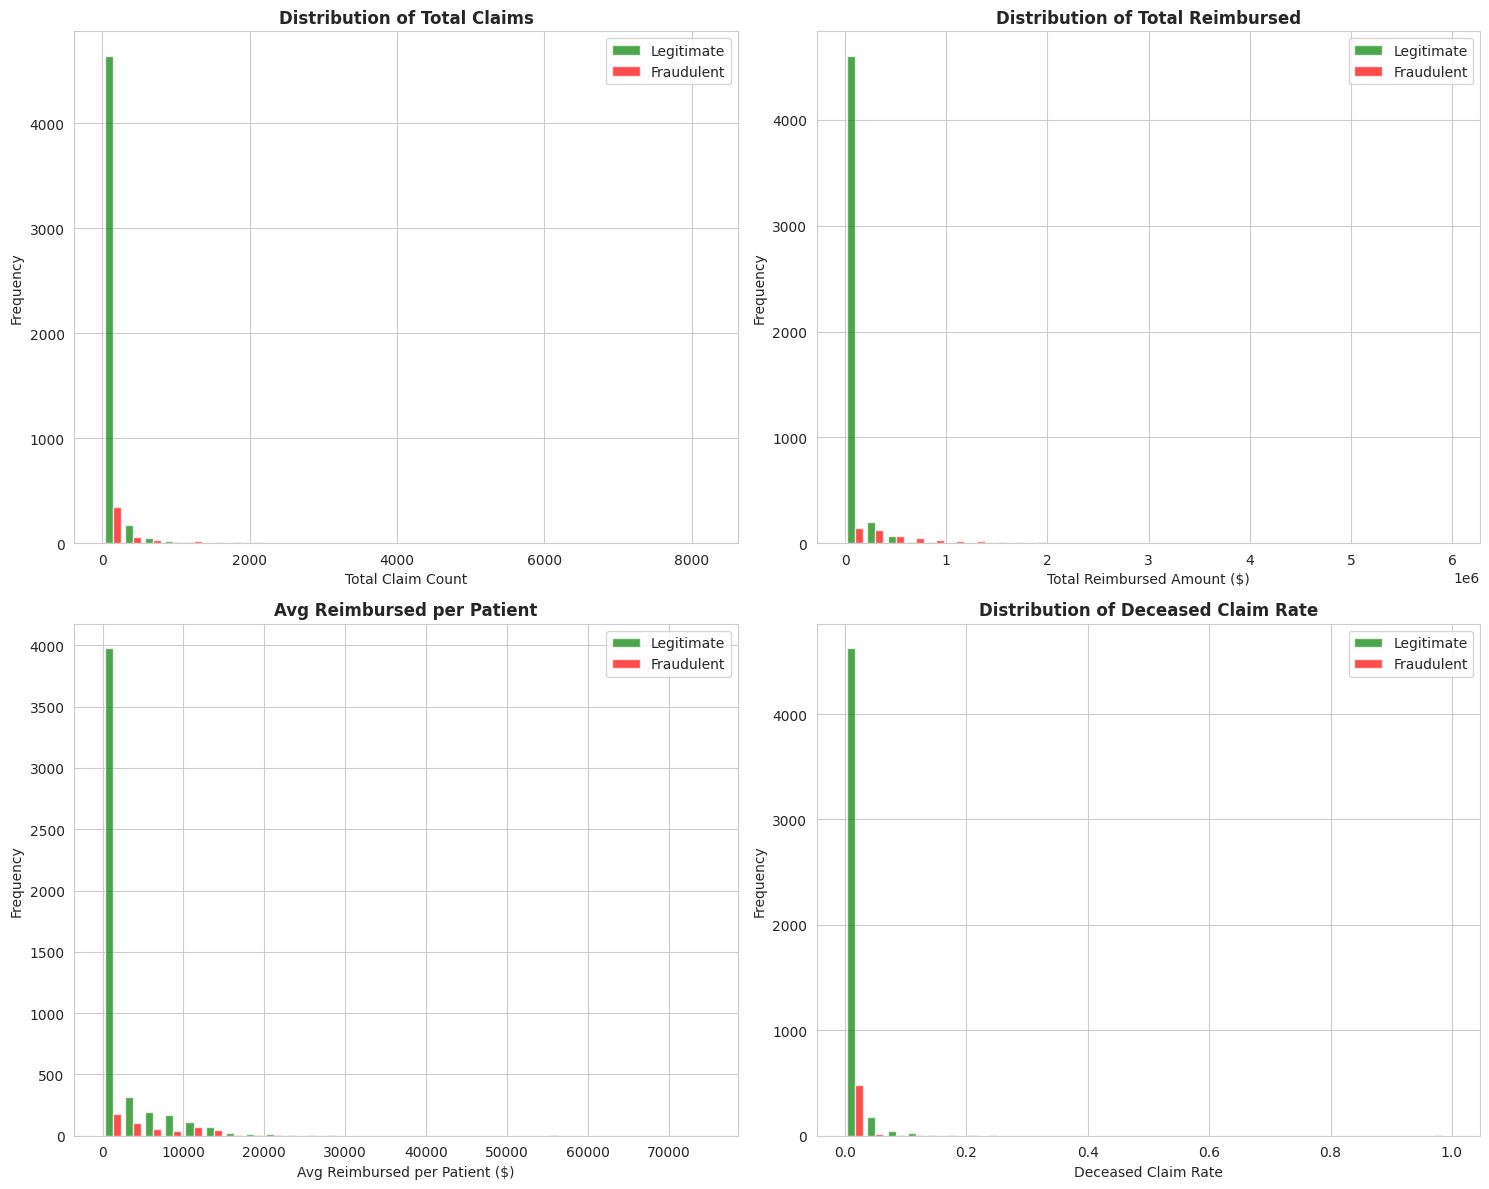


[7.2] Creating box plots for key metrics...


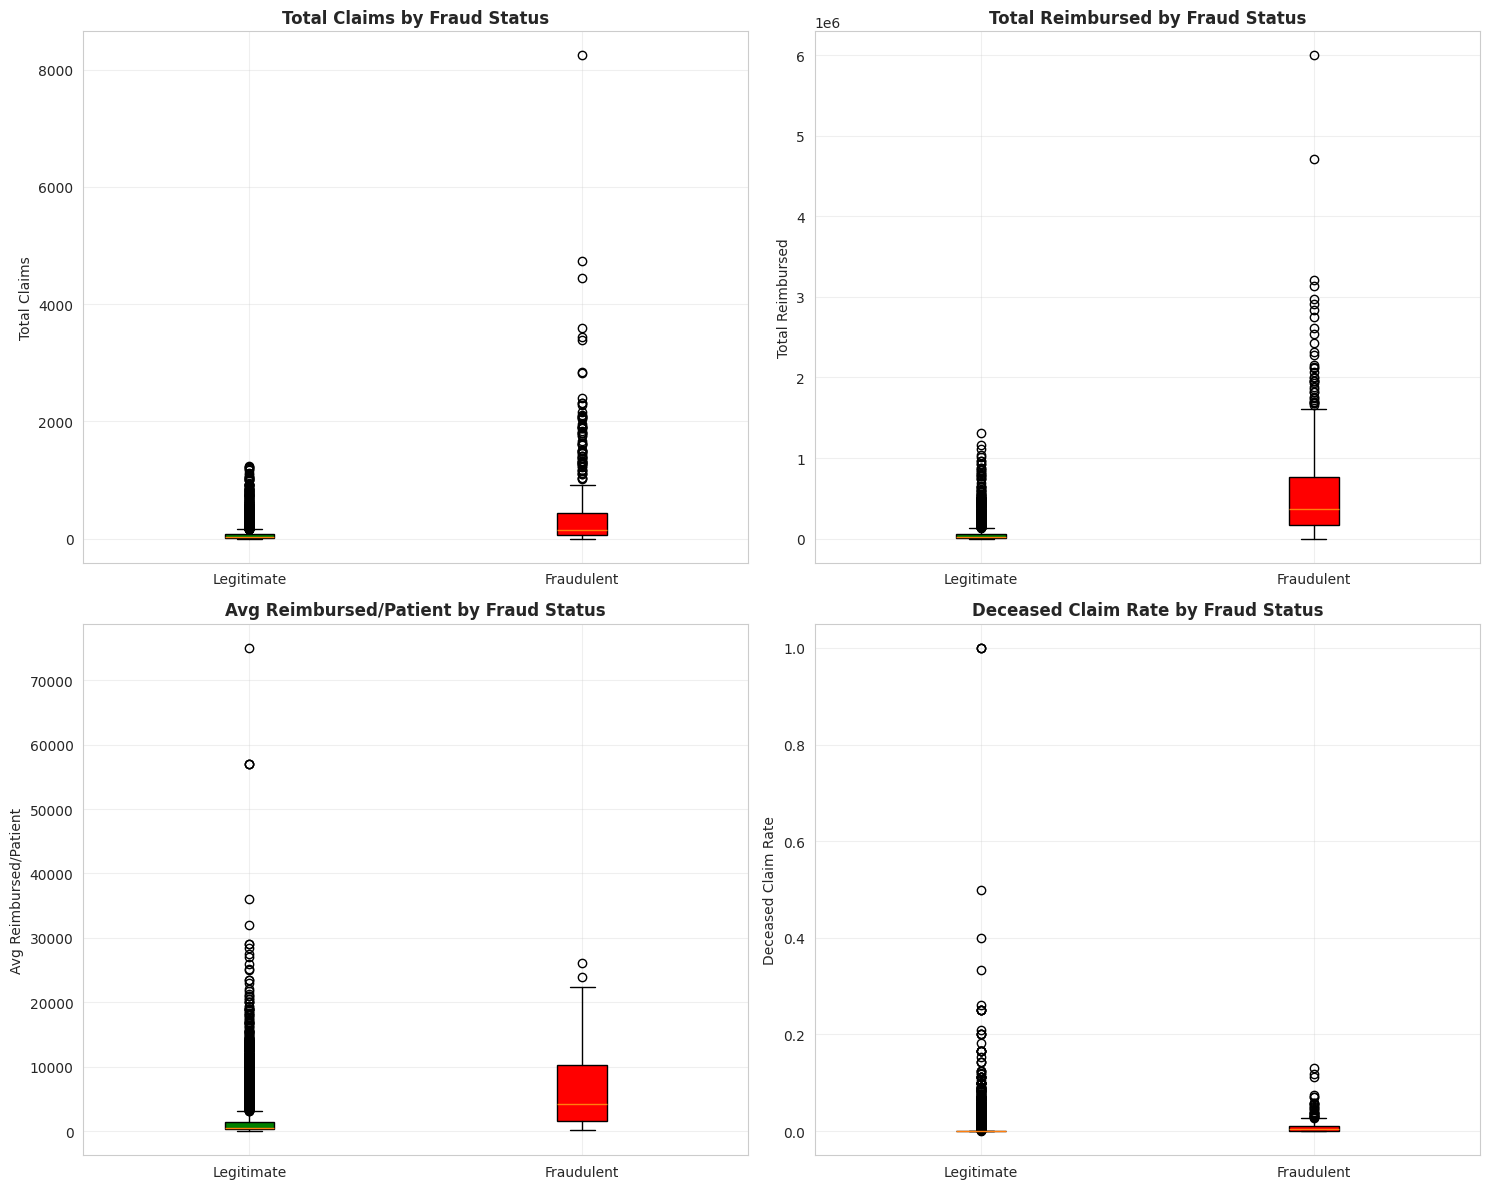


[7.3] Creating correlation heatmap...


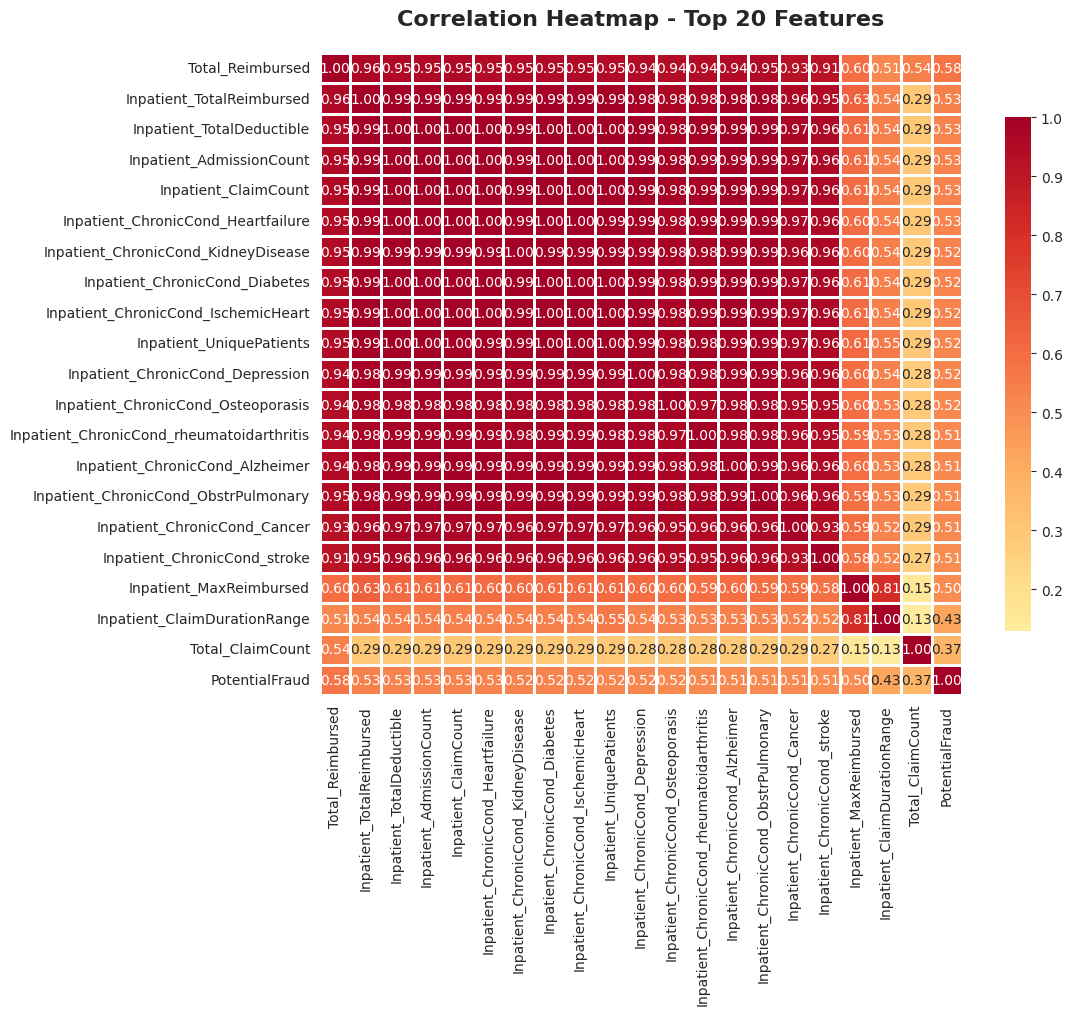


--------------------------------------------------------------------------------
TOP FEATURES CORRELATED WITH FRAUD
--------------------------------------------------------------------------------
PotentialFraud                               1.000000
Total_Reimbursed                             0.575558
Inpatient_TotalReimbursed                    0.532795
Inpatient_TotalDeductible                    0.525454
Inpatient_AdmissionCount                     0.525393
Inpatient_ClaimCount                         0.525393
Inpatient_ChronicCond_Heartfailure           0.525102
Inpatient_ChronicCond_KidneyDisease          0.524471
Inpatient_ChronicCond_Diabetes               0.524358
Inpatient_ChronicCond_IschemicHeart          0.524195
Inpatient_UniquePatients                     0.522256
Inpatient_ChronicCond_Depression             0.520354
Inpatient_ChronicCond_Osteoporasis           0.516755
Inpatient_ChronicCond_rheumatoidarthritis    0.514836
Inpatient_ChronicCond_Alzheimer              0

In [ ]:

print("\n" + "="*80)
print("PART 7: CREATING VISUALIZATIONS")
print("="*80)

# 7.1 Claim Amount Trends by Fraud Status
print("\n[7.1] Creating claim amount comparison plots...")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Total Claims
axes[0,0].hist([provider_level[provider_level['PotentialFraud']==0]['Total_ClaimCount'],
                provider_level[provider_level['PotentialFraud']==1]['Total_ClaimCount']],
               label=['Legitimate', 'Fraudulent'], bins=30, alpha=0.7, color=['green', 'red'])
axes[0,0].set_xlabel('Total Claim Count')
axes[0,0].set_ylabel('Frequency')
axes[0,0].set_title('Distribution of Total Claims', fontweight='bold')
axes[0,0].legend()

# Total Reimbursed Amount
axes[0,1].hist([provider_level[provider_level['PotentialFraud']==0]['Total_Reimbursed'],
                provider_level[provider_level['PotentialFraud']==1]['Total_Reimbursed']],
               label=['Legitimate', 'Fraudulent'], bins=30, alpha=0.7, color=['green', 'red'])
axes[0,1].set_xlabel('Total Reimbursed Amount ($)')
axes[0,1].set_ylabel('Frequency')
axes[0,1].set_title('Distribution of Total Reimbursed', fontweight='bold')
axes[0,1].legend()

# Avg Reimbursed per Patient
axes[1,0].hist([provider_level[provider_level['PotentialFraud']==0]['AvgReimbursed_PerPatient'],
                provider_level[provider_level['PotentialFraud']==1]['AvgReimbursed_PerPatient']],
               label=['Legitimate', 'Fraudulent'], bins=30, alpha=0.7, color=['green', 'red'])
axes[1,0].set_xlabel('Avg Reimbursed per Patient ($)')
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_title('Avg Reimbursed per Patient', fontweight='bold')
axes[1,0].legend()

# Deceased Claim Rate
axes[1,1].hist([provider_level[provider_level['PotentialFraud']==0]['DeceasedClaim_Rate'],
                provider_level[provider_level['PotentialFraud']==1]['DeceasedClaim_Rate']],
               label=['Legitimate', 'Fraudulent'], bins=30, alpha=0.7, color=['green', 'red'])
axes[1,1].set_xlabel('Deceased Claim Rate')
axes[1,1].set_ylabel('Frequency')
axes[1,1].set_title('Distribution of Deceased Claim Rate', fontweight='bold')
axes[1,1].legend()

plt.tight_layout()
plt.savefig('claim_amount_trends.png', dpi=300, bbox_inches='tight')
plt.show()

# 7.2 Box plots for key metrics
print("\n[7.2] Creating box plots for key metrics...")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

metrics = ['Total_ClaimCount', 'Total_Reimbursed', 'AvgReimbursed_PerPatient', 'DeceasedClaim_Rate']
titles = ['Total Claims', 'Total Reimbursed', 'Avg Reimbursed/Patient', 'Deceased Claim Rate']

for idx, (metric, title) in enumerate(zip(metrics, titles)):
    ax = axes[idx//2, idx%2]
    data = [provider_level[provider_level['PotentialFraud']==0][metric],
            provider_level[provider_level['PotentialFraud']==1][metric]]
    bp = ax.boxplot(data, labels=['Legitimate', 'Fraudulent'], patch_artist=True)
    bp['boxes'][0].set_facecolor('green')
    bp['boxes'][1].set_facecolor('red')
    ax.set_ylabel(title)
    ax.set_title(f'{title} by Fraud Status', fontweight='bold')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('fraud_comparison_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

# 7.3 Correlation Heatmap
print("\n[7.3] Creating correlation heatmap...")

# Select numeric columns for correlation
numeric_cols = provider_level.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove('Provider') if 'Provider' in numeric_cols else None

# Calculate correlation with target
correlations = provider_level[numeric_cols].corr()['PotentialFraud'].sort_values(ascending=False)

# Plot top correlations
top_features = correlations.abs().sort_values(ascending=False)[1:21]  # Top 20 features

plt.figure(figsize=(12, 10))
sns.heatmap(provider_level[top_features.index.tolist() + ['PotentialFraud']].corr(),
            annot=True, fmt='.2f', cmap='RdYlGn_r', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap - Top 20 Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Display top correlations with fraud
print("\n" + "-"*80)
print("TOP FEATURES CORRELATED WITH FRAUD")
print("-"*80)
print(correlations.head(15))


Is responsible for Saving the Provider-Level Dataset and providing a summary of the completed data exploration and feature engineering process. Its main actions are:

Save to CSV: It saves the provider_level DataFrame, which contains all the aggregated and engineered features, to a CSV file named provider_level.csv. This file is then ready for subsequent machine learning model development.
Display Summary Statistics: It prints descriptive statistics of the provider_level DataFrame, offering a quick overview of the central tendency, dispersion, and shape of its distribution.
Display Final Feature List: It lists all the column names (features) present in the final provider_level dataset.
Finally, it prints a concluding message indicating that the data exploration and feature engineering are complete, the visualizations are saved, and the dataset is ready for the next step: model development.

In [ ]:
print("\n" + "="*80)
print("PART 8: SAVING PROVIDER-LEVEL DATASET")
print("="*80)

# Save to CSV
provider_level.to_csv('provider_level.csv', index=False)
print(f"✓ Saved provider_level.csv")
print(f"  Shape: {provider_level.shape}")
print(f"  Columns: {provider_level.shape[1]}")

# Display summary statistics
print("\n" + "-"*80)
print("PROVIDER-LEVEL DATASET SUMMARY")
print("-"*80)
print(provider_level.describe())

# Display column names
print("\n" + "-"*80)
print("FINAL FEATURE LIST")
print("-"*80)
for i, col in enumerate(provider_level.columns, 1):
    print(f"{i}. {col}")

print("\n" + "="*80)
print("DATA EXPLORATION & FEATURE ENGINEERING COMPLETED!")
print("="*80)
print("\n✓ All visualizations saved:")
print("  - fraud_distribution.png")
print("  - claim_amount_trends.png")
print("  - fraud_comparison_boxplots.png")
print("  - correlation_heatmap.png")
print("\n✓ Dataset ready for modeling: provider_level.csv")
print("\nNext Step: Proceed to 02_modeling.ipynb")
print("="*80)


PART 8: SAVING PROVIDER-LEVEL DATASET
✓ Saved provider_level.csv
  Shape: (5410, 55)
  Columns: 55

--------------------------------------------------------------------------------
PROVIDER-LEVEL DATASET SUMMARY
--------------------------------------------------------------------------------
       PotentialFraud  Inpatient_ClaimCount  Inpatient_UniquePatients  \
count     5410.000000           5410.000000               5410.000000   
mean         0.093530              7.481331                  6.768207   
std          0.291201             23.704217                 20.906996   
min          0.000000              0.000000                  0.000000   
25%          0.000000              0.000000                  0.000000   
50%          0.000000              0.000000                  0.000000   
75%          0.000000              5.000000                  5.000000   
max          1.000000            516.000000                458.000000   

       Inpatient_TotalReimbursed  Inpatient_AvgR